# NOTE:

This dataset contains data of Females only

This dataset contains parameters revolving around the condition of diabetes

In this case study, i have tried to see the impact of parameters on a patient being diabetic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Checking Null Values

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Checking zero values

In [30]:
#Glucose
zeros_gl = (df['Glucose']==0).sum()
zeros_gl

5

In [31]:
#BloodPressure
zeros_bp = (df['BloodPressure']==0).sum()
zeros_bp

35

In [32]:
#SkinThickness
zeros_st = (df['SkinThickness']==0).sum()
zeros_st

227

In [33]:
#Insulin
zeros_in = (df['Insulin']==0).sum()
zeros_in

374

In [34]:
#BMI
zeros_bm = (df['BMI']==0).sum()
zeros_bm

11

In [35]:
#DiabetesPedigreeFunction
zeros_dpf = (df['DiabetesPedigreeFunction']==0).sum()
zeros_dpf

0

In [36]:
#Age
zeros_ag = (df['Age']==0).sum()
zeros_ag

0

##  5 Point Summary and Checking Outliers

In [39]:
#Pregnancies
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

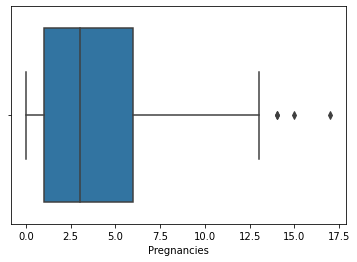

In [40]:
sns.boxplot(df['Pregnancies'])
plt.show()

In [41]:
#Glucose
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

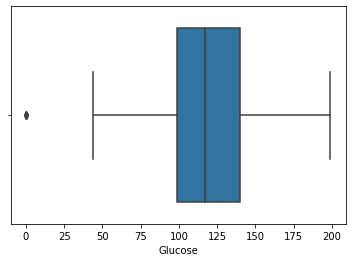

In [42]:
sns.boxplot(df['Glucose'])
plt.show()

In [43]:
#BloodPressure
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

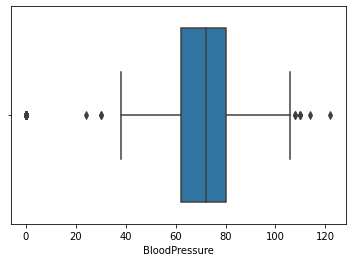

In [44]:
sns.boxplot(df['BloodPressure'])
plt.show()

In [45]:
#SkinThickness
df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

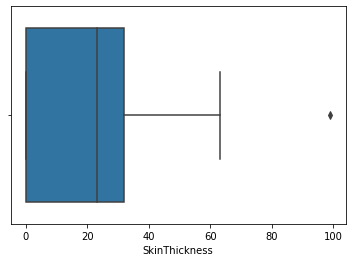

In [46]:
sns.boxplot(df['SkinThickness'])
plt.show()

In [47]:
#Insulin
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

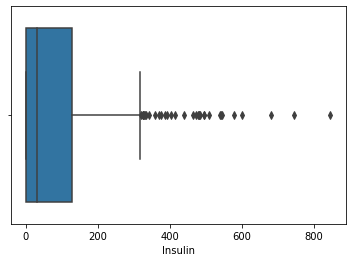

In [48]:
sns.boxplot(df['Insulin'])
plt.show()

In [49]:
#BMI
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

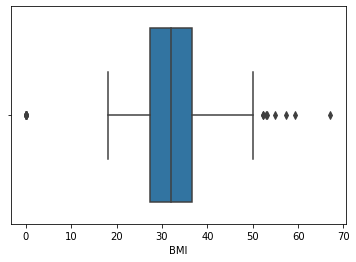

In [50]:
sns.boxplot(df['BMI'])
plt.show()

In [51]:
#DiabetesPedigreeFunction
df['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

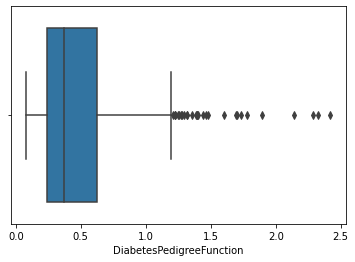

In [52]:
sns.boxplot(df['DiabetesPedigreeFunction'])
plt.show()

In [53]:
#Age
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

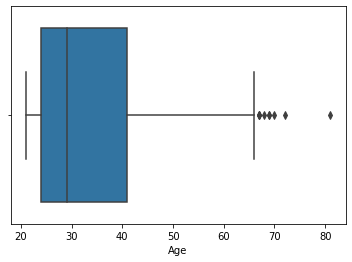

In [54]:
sns.boxplot(df['Age'])
plt.show()

##  Replacing zero values with NaN

In [66]:
x = df.columns
x

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [67]:
x = x.drop(['Pregnancies','DiabetesPedigreeFunction','Age','Outcome'])
x

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [68]:
for y in x:
    df[y].replace(0, np.NaN, inplace=True)

In [69]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##  Filling of NaN values

In [70]:
mean_gl = df['Glucose'].mean()
mean_gl

121.6867627785059

In [71]:
df['Glucose'].fillna(mean_gl, inplace=True)

In [72]:
median_bp = df['BloodPressure'].median()
median_bp

72.0

In [73]:
df['BloodPressure'].fillna(median_bp, inplace=True)

In [74]:
median_st = df['SkinThickness'].median()
median_st

29.0

In [75]:
df['SkinThickness'].fillna(median_st, inplace=True)

In [79]:
median_in = 30.5

In [80]:
df['Insulin'].fillna(median_in, inplace=True)

In [81]:
df['BMI'].fillna(32, inplace=True)

In [82]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Feature Engineering

In [83]:
b = df['BMI']
b

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [84]:
c = []
for x in b:
    if x<18.5:
        c.append('Under-Weight')
    elif x>=18.5 and x<=24.9:
        c.append('Normal-Weight')
    elif x>=25 and x<=29.9:
        c.append('Over-Weight')
    elif x>=30 and x<=39.9:
        c.append('Obesity')
    else:
        c.append('Extreme Obesity')

In [85]:
c

['Obesity',
 'Over-Weight',
 'Normal-Weight',
 'Over-Weight',
 'Extreme Obesity',
 'Over-Weight',
 'Obesity',
 'Obesity',
 'Obesity',
 'Obesity',
 'Obesity',
 'Obesity',
 'Over-Weight',
 'Obesity',
 'Over-Weight',
 'Obesity',
 'Extreme Obesity',
 'Over-Weight',
 'Extreme Obesity',
 'Obesity',
 'Obesity',
 'Obesity',
 'Obesity',
 'Over-Weight',
 'Obesity',
 'Obesity',
 'Obesity',
 'Normal-Weight',
 'Normal-Weight',
 'Obesity',
 'Obesity',
 'Obesity',
 'Normal-Weight',
 'Normal-Weight',
 'Over-Weight',
 'Normal-Weight',
 'Obesity',
 'Obesity',
 'Obesity',
 'Obesity',
 'Obesity',
 'Extreme Obesity',
 'Normal-Weight',
 'Extreme Obesity',
 'Over-Weight',
 'Extreme Obesity',
 'Over-Weight',
 'Over-Weight',
 'Obesity',
 'Obesity',
 'Normal-Weight',
 'Normal-Weight',
 'Normal-Weight',
 'Obesity',
 'Obesity',
 'Normal-Weight',
 'Obesity',
 'Extreme Obesity',
 'Extreme Obesity',
 'Extreme Obesity',
 'Obesity',
 'Obesity',
 'Over-Weight',
 'Over-Weight',
 'Obesity',
 'Over-Weight',
 'Obesity',
 '

In [86]:
df['PatientBodyType'] = c

In [87]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PatientBodyType
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1,Obesity
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0,Over-Weight
2,8,183.0,64.0,29.0,30.5,23.3,0.672,32,1,Normal-Weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Over-Weight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Extreme Obesity
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Obesity
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27,0,Obesity
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Over-Weight
766,1,126.0,60.0,29.0,30.5,30.1,0.349,47,1,Obesity


In [88]:
d = df['Glucose']
d

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [100]:
e = []
for x in d:
    if x<120:
        e.append('Normal')
    elif x>=120 and x<160:
        e.append('Early Diabetes')
    else:
        e.append('Diabetic')

In [101]:
e

['Early Diabetes',
 'Normal',
 'Diabetic',
 'Normal',
 'Early Diabetes',
 'Normal',
 'Normal',
 'Normal',
 'Diabetic',
 'Early Diabetes',
 'Normal',
 'Diabetic',
 'Early Diabetes',
 'Diabetic',
 'Diabetic',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Early Diabetes',
 'Normal',
 'Diabetic',
 'Normal',
 'Early Diabetes',
 'Early Diabetes',
 'Early Diabetes',
 'Normal',
 'Early Diabetes',
 'Normal',
 'Normal',
 'Early Diabetes',
 'Normal',
 'Normal',
 'Early Diabetes',
 'Normal',
 'Early Diabetes',
 'Normal',
 'Normal',
 'Normal',
 'Diabetic',
 'Early Diabetes',
 'Normal',
 'Diabetic',
 'Early Diabetes',
 'Diabetic',
 'Early Diabetes',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Diabetic',
 'Early Diabetes',
 'Normal',
 'Diabetic',
 'Normal',
 'Early Diabetes',
 'Normal',
 'Normal',
 'Early Diabetes',
 'Normal',
 'Early Diabetes',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Early Diabetes',
 'Normal',
 'Early Diabetes',
 'Early Diabetes',

In [102]:
df['GlucoseResult'] = e

In [103]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PatientBodyType,GlucoseResult
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1,Obesity,Early Diabetes
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0,Over-Weight,Normal
2,8,183.0,64.0,29.0,30.5,23.3,0.672,32,1,Normal-Weight,Diabetic
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Over-Weight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Extreme Obesity,Early Diabetes
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Obesity,Normal
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27,0,Obesity,Early Diabetes
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Over-Weight,Early Diabetes
766,1,126.0,60.0,29.0,30.5,30.1,0.349,47,1,Obesity,Early Diabetes


In [97]:
f = df['BloodPressure']
f

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64

In [98]:
g = []
for x in f:
    if x<80:
        g.append('Normal')
    elif x>=80 and x<90:
        g.append('HighBloodPressure-Stage-1')
    elif x>=90 and x<=120:
        g.append('HighBloodPressure-Stage-2')
    else:
        g.append('Hypertensive Crisis')
        

In [99]:
g

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'HighBloodPressure-Stage-2',
 'HighBloodPressure-Stage-2',
 'Normal',
 'HighBloodPressure-Stage-1',
 'Normal',
 'Normal',
 'Normal',
 'HighBloodPressure-Stage-1',
 'Normal',
 'Normal',
 'Normal',
 'HighBloodPressure-Stage-1',
 'HighBloodPressure-Stage-1',
 'HighBloodPressure-Stage-2',
 'HighBloodPressure-Stage-1',
 'HighBloodPressure-Stage-2',
 'Normal',
 'Normal',
 'Normal',
 'HighBloodPressure-Stage-1',
 'HighBloodPressure-Stage-2',
 'Normal',
 'Normal',
 'Normal',
 'HighBloodPressure-Stage-2',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'HighBloodPressure-Stage-1',
 'HighBloodPressure-Stage-2',
 'HighBloodPressure-Stage-2',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'HighBloodPressure-Stage-1',
 'Normal',
 'Normal',
 'HighBloodPressure-Stage-2',
 'Normal',
 'Normal',
 'Normal',
 'HighBloodPressure-Stage-1',
 'HighBloodPressure-

In [123]:
df['BPResult'] = g

In [124]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PatientBodyType,GlucoseResult,Insulin SI,Insulin_Status,BPResult
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1,Obesity,Early Diabetes,211.8225,Normal Insulin Level,Normal
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0,Over-Weight,Normal,211.8225,Normal Insulin Level,Normal
2,8,183.0,64.0,29.0,30.5,23.3,0.672,32,1,Normal-Weight,Diabetic,211.8225,Normal Insulin Level,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Over-Weight,Normal,652.8300,Abnormal Insulin Level,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Extreme Obesity,Early Diabetes,1166.7600,Abnormal Insulin Level,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Obesity,Normal,1250.1000,Abnormal Insulin Level,Normal
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27,0,Obesity,Early Diabetes,211.8225,Normal Insulin Level,Normal
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Over-Weight,Early Diabetes,777.8400,Abnormal Insulin Level,Normal
766,1,126.0,60.0,29.0,30.5,30.1,0.349,47,1,Obesity,Early Diabetes,211.8225,Normal Insulin Level,Normal


In [104]:
h = df['Insulin']
h

0       30.5
1       30.5
2       30.5
3       94.0
4      168.0
       ...  
763    180.0
764     30.5
765    112.0
766     30.5
767     30.5
Name: Insulin, Length: 768, dtype: float64

In [108]:
i = []
for x in h:
    z = x*6.945
    i.append(z)

In [110]:
i

[211.82250000000002,
 211.82250000000002,
 211.82250000000002,
 652.83,
 1166.76,
 211.82250000000002,
 611.1600000000001,
 211.82250000000002,
 3771.135,
 211.82250000000002,
 211.82250000000002,
 211.82250000000002,
 211.82250000000002,
 5875.47,
 1215.375,
 211.82250000000002,
 1597.3500000000001,
 211.82250000000002,
 576.4350000000001,
 666.72,
 1632.075,
 211.82250000000002,
 211.82250000000002,
 211.82250000000002,
 1013.97,
 798.6750000000001,
 211.82250000000002,
 972.3000000000001,
 763.95,
 211.82250000000002,
 211.82250000000002,
 1701.525,
 375.03000000000003,
 211.82250000000002,
 211.82250000000002,
 1333.44,
 211.82250000000002,
 211.82250000000002,
 211.82250000000002,
 1437.615,
 486.15000000000003,
 211.82250000000002,
 211.82250000000002,
 1666.8000000000002,
 211.82250000000002,
 211.82250000000002,
 211.82250000000002,
 211.82250000000002,
 211.82250000000002,
 211.82250000000002,
 569.49,
 250.02,
 159.735,
 2083.5,
 2375.19,
 211.82250000000002,
 2111.28,
 763.9

In [111]:
df['Insulin SI'] = i

In [112]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PatientBodyType,GlucoseResult,Insulin SI
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1,Obesity,Early Diabetes,211.8225
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0,Over-Weight,Normal,211.8225
2,8,183.0,64.0,29.0,30.5,23.3,0.672,32,1,Normal-Weight,Diabetic,211.8225
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Over-Weight,Normal,652.8300
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Extreme Obesity,Early Diabetes,1166.7600
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Obesity,Normal,1250.1000
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27,0,Obesity,Early Diabetes,211.8225
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Over-Weight,Early Diabetes,777.8400
766,1,126.0,60.0,29.0,30.5,30.1,0.349,47,1,Obesity,Early Diabetes,211.8225


In [118]:
j = []
for x in i:
    if x<549:
        j.append('Normal Insulin Level')
    else:
        j.append('Abnormal Insulin Level')


In [119]:
j

['Normal Insulin Level',
 'Normal Insulin Level',
 'Normal Insulin Level',
 'Abnormal Insulin Level',
 'Abnormal Insulin Level',
 'Normal Insulin Level',
 'Abnormal Insulin Level',
 'Normal Insulin Level',
 'Abnormal Insulin Level',
 'Normal Insulin Level',
 'Normal Insulin Level',
 'Normal Insulin Level',
 'Normal Insulin Level',
 'Abnormal Insulin Level',
 'Abnormal Insulin Level',
 'Normal Insulin Level',
 'Abnormal Insulin Level',
 'Normal Insulin Level',
 'Abnormal Insulin Level',
 'Abnormal Insulin Level',
 'Abnormal Insulin Level',
 'Normal Insulin Level',
 'Normal Insulin Level',
 'Normal Insulin Level',
 'Abnormal Insulin Level',
 'Abnormal Insulin Level',
 'Normal Insulin Level',
 'Abnormal Insulin Level',
 'Abnormal Insulin Level',
 'Normal Insulin Level',
 'Normal Insulin Level',
 'Abnormal Insulin Level',
 'Normal Insulin Level',
 'Normal Insulin Level',
 'Normal Insulin Level',
 'Abnormal Insulin Level',
 'Normal Insulin Level',
 'Normal Insulin Level',
 'Normal Insulin L

In [120]:
df['Insulin_Status'] = j

In [194]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PatientBodyType,GlucoseResult,Insulin SI,Insulin_Status,BPResult
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1,Obesity,Early Diabetes,211.8225,Normal Insulin Level,Normal
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0,Over-Weight,Normal,211.8225,Normal Insulin Level,Normal
2,8,183.0,64.0,29.0,30.5,23.3,0.672,32,1,Normal-Weight,Diabetic,211.8225,Normal Insulin Level,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Over-Weight,Normal,652.8300,Abnormal Insulin Level,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Extreme Obesity,Early Diabetes,1166.7600,Abnormal Insulin Level,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Obesity,Normal,1250.1000,Abnormal Insulin Level,Normal
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27,0,Obesity,Early Diabetes,211.8225,Normal Insulin Level,Normal
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Over-Weight,Early Diabetes,777.8400,Abnormal Insulin Level,Normal
766,1,126.0,60.0,29.0,30.5,30.1,0.349,47,1,Obesity,Early Diabetes,211.8225,Normal Insulin Level,Normal


In [122]:
df['Insulin_Status'].value_counts()

Normal Insulin Level      479
Abnormal Insulin Level    289
Name: Insulin_Status, dtype: int64

In [125]:
df['BPResult'].value_counts()

Normal                       563
HighBloodPressure-Stage-1    145
HighBloodPressure-Stage-2     59
Hypertensive Crisis            1
Name: BPResult, dtype: int64

##  Visualisations and Conclusions 

In [129]:
k = (df['Outcome']==1).sum()
l = (df['Outcome']==0).sum()

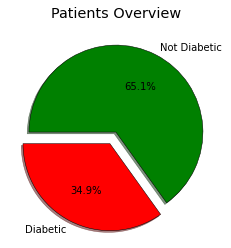

In [135]:
plt.style.use('ggplot')

plt.pie([k,l], labels=['Diabetic', 'Not Diabetic'], 
       colors=['Red', 'Green'], explode=[0.15, 0],
       shadow=True, startangle=180, autopct='%1.1f%%',
       wedgeprops={'edgecolor':'black'})

plt.title('Patients Overview')

plt.show()

### lnsight 1

From the above pie chart, we can see that, of all the data that we have, there are 34.9 % of patients who are Diabetic and 65.1 % of patients who are Not Diabetic.

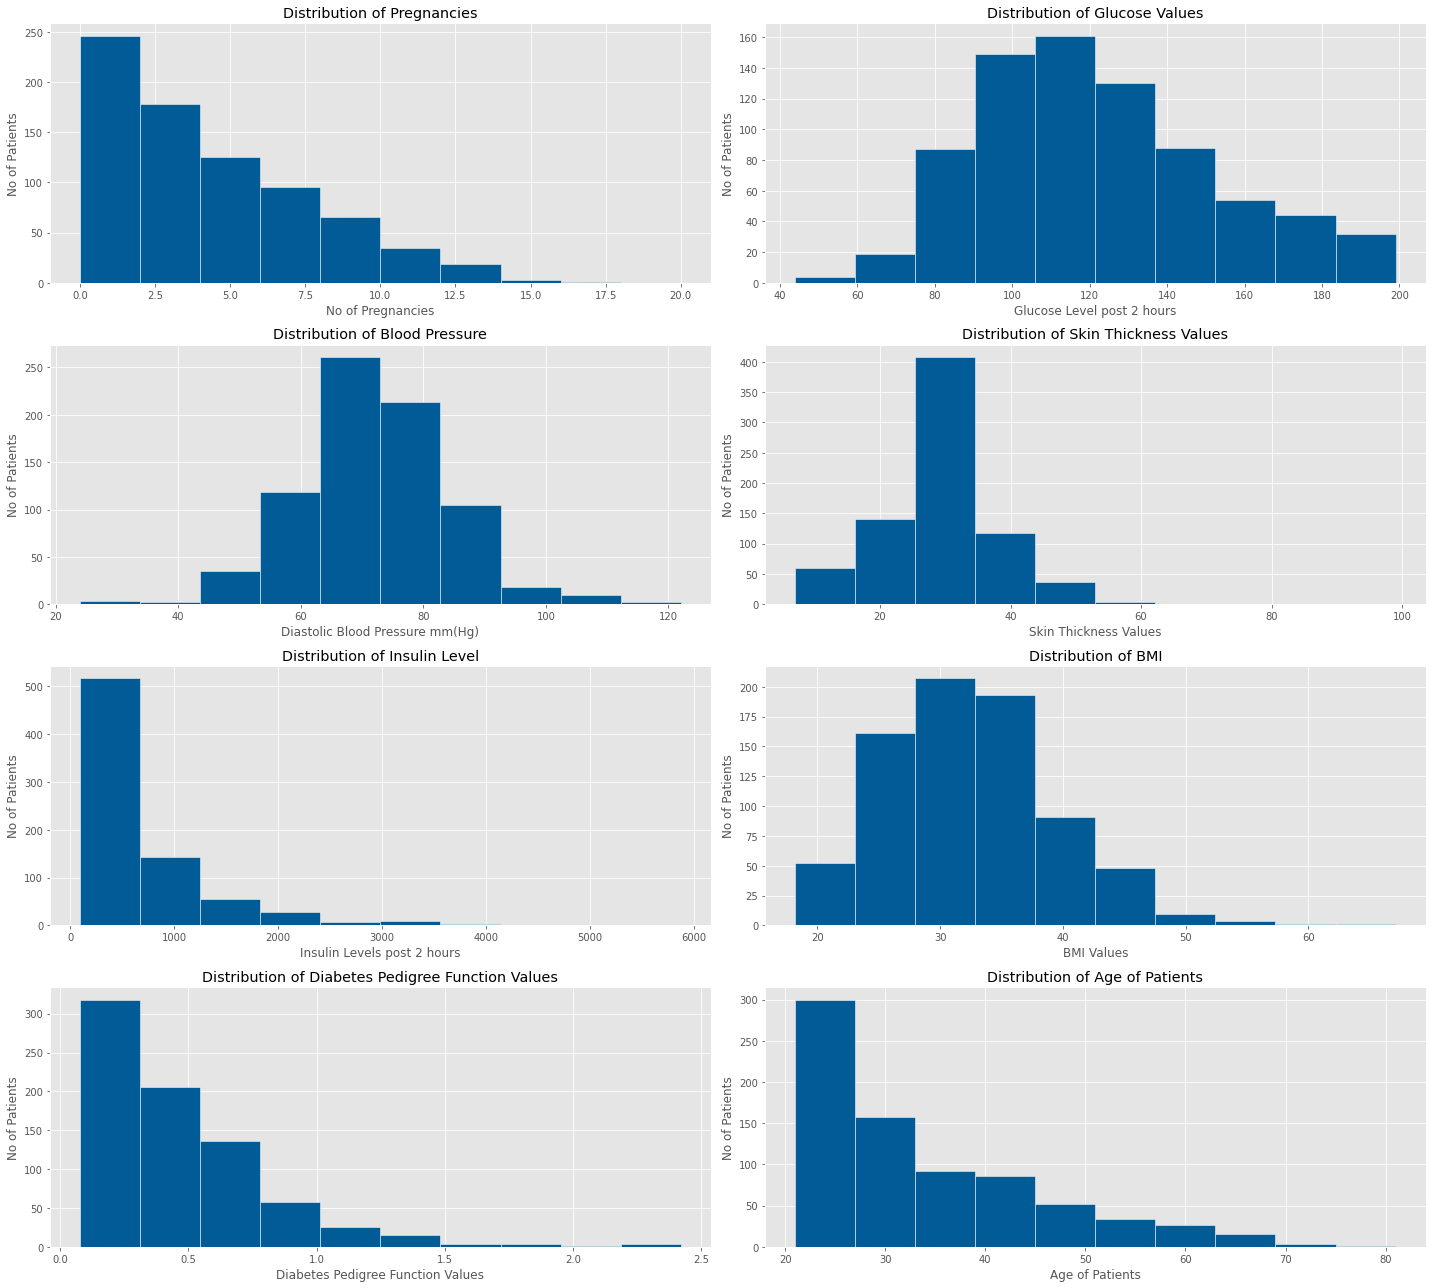

In [163]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,18))

aa = plt.subplot(4,2,1)
ab = plt.subplot(4,2,2)
ac = plt.subplot(4,2,3)
ad = plt.subplot(4,2,4)
ae = plt.subplot(4,2,5)
af = plt.subplot(4,2,6)
ag = plt.subplot(4,2,7)
ah = plt.subplot(4,2,8)

aa.hist(df['Pregnancies'], color='#005b96', bins=[0,2,4,6,8,10,12,14,16,18,20], edgecolor='white')
aa.set(xlabel='No of Pregnancies')
aa.set(ylabel='No of Patients')
aa.set_title('Distribution of Pregnancies')


ab.hist(df['Glucose'], color='#005b96', edgecolor='white')
ab.set(xlabel='Glucose Level post 2 hours')
ab.set(ylabel='No of Patients')
ab.set_title('Distribution of Glucose Values')


ac.hist(df['BloodPressure'], color='#005b96', edgecolor='white')
ac.set(xlabel='Diastolic Blood Pressure mm(Hg)')
ac.set(ylabel='No of Patients')
ac.set_title('Distribution of Blood Pressure')


ad.hist(df['SkinThickness'], color='#005b96', edgecolor='white')
ad.set(xlabel='Skin Thickness Values')
ad.set(ylabel='No of Patients')
ad.set_title('Distribution of Skin Thickness Values')


ae.hist(df['Insulin SI'], color='#005b96', edgecolor='white')
ae.set(xlabel='Insulin Levels post 2 hours')
ae.set(ylabel='No of Patients')
ae.set_title('Distribution of Insulin Level')


af.hist(df['BMI'], color='#005b96', edgecolor='white')
af.set(xlabel='BMI Values')
af.set(ylabel='No of Patients')
af.set_title('Distribution of BMI')


ag.hist(df['DiabetesPedigreeFunction'], color='#005b96', edgecolor='white')
ag.set(xlabel='Diabetes Pedigree Function Values')
ag.set(ylabel='No of Patients')
ag.set_title('Distribution of Diabetes Pedigree Function Values')

ah.hist(df['Age'], color='#005b96', edgecolor='white')
ah.set(xlabel='Age of Patients')
ah.set(ylabel='No of Patients')
ah.set_title('Distribution of Age of Patients')

plt.tight_layout()

plt.show()

###  Insight 2

Above Histogram Plots have been drawn to understand the variation of multiple parameters responsible for Diabetes and their distribution amongs the patients involved in our data set

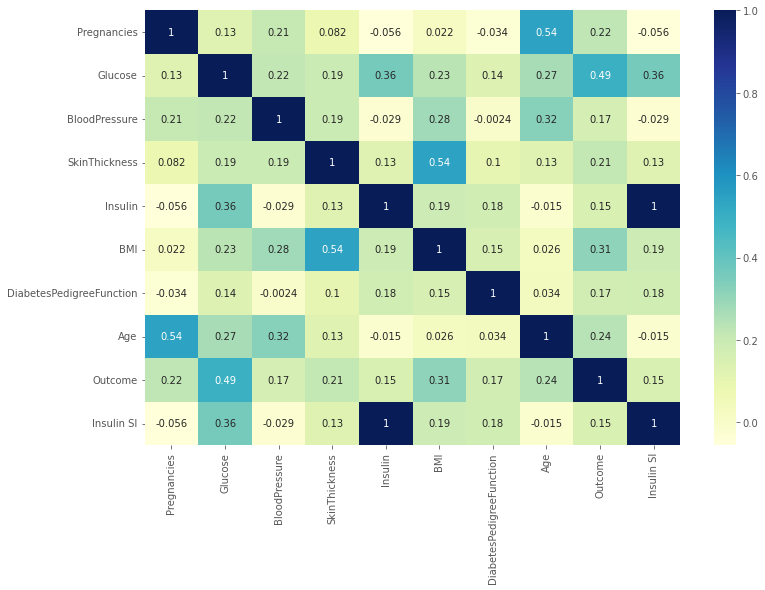

In [169]:
cor=df.corr()

fig = plt.figure(figsize=(12,8))

sns.heatmap(cor,cmap='YlGnBu',annot=True)
plt.show()

###  Insight 3

From the above heatmap, we can conclude the following points:

1) Outcome(whether the patient is Diabetic or Not) is significantly positively correlated to Glucose Level and BMI of the patient.

2) Outcome(whether the patient is Diabetic or Not) is lightly positively correlated to Age, Pregnancies and Skin Thickness of the patient.

3) Outcome(whether the patient is Diabetic or Not) is very lightly positively correlated to Blood Pressure, Insulin level and Diabetes Pedigree Function.

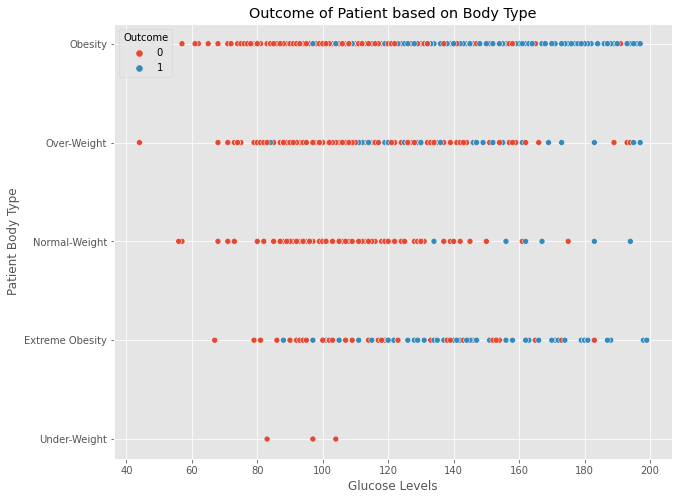

In [176]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,8))

sns.scatterplot(df.Glucose, df.PatientBodyType, hue=df.Outcome)

plt.xlabel('Glucose Levels')
plt.ylabel('Patient Body Type')
plt.title('Outcome of Patient based on Body Type')


plt.show()

###  Insight 4

1) For Under-Weight people, there is no case seen of being Diabetic in this data set.

2) For Normal-Weight people, there are few cases seen of being Diabetic post the threshold value of 140 Glucose Level.

3) For Over-Weight people, cases of being Diabetic can be seen below the threshold value of Glucose Level. In this particular dataset, it starts from around 110 Glucose Level.

4) For Obese People, there is huge concentration of being Diabetic post the Glucose Value of 120.

5) For Extreme Obese People, there is case of being Diabetic post the Glucose Value of 100.

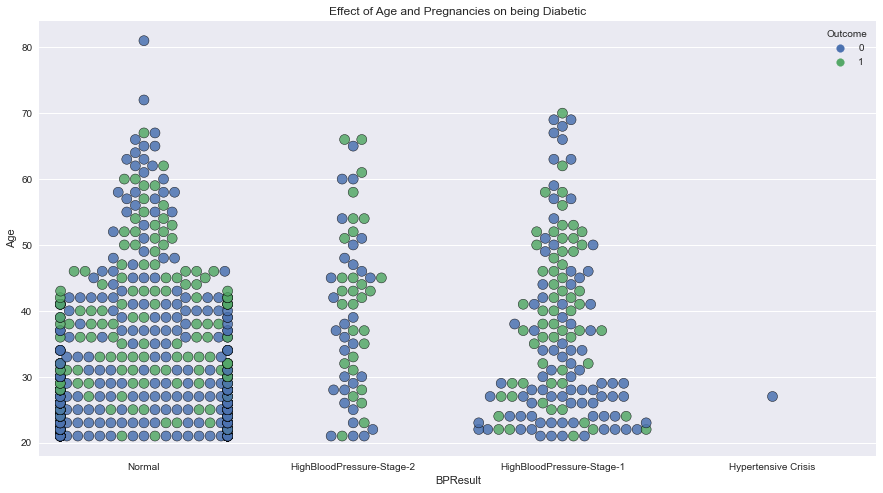

In [198]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(15,8))

sns.swarmplot(df.BPResult, df.Age, hue=df.Outcome, size=10, alpha=0.85, edgecolor='black', linewidth=0.5)

plt.title('Effect of Age and Pregnancies on being Diabetic')

plt.show()

###   Insight 5

Irrespective of the Blood Pressure Levels, More No of People are Diabetic above the age of 30 as compared to people below the age of 30

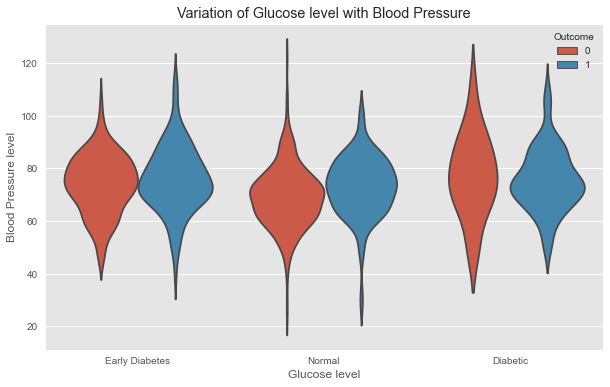

In [209]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,6))

sns.violinplot(df.GlucoseResult, df.BloodPressure, hue=df.Outcome, inner=None)

plt.xlabel('Glucose level')
plt.ylabel('Blood Pressure level')
plt.title('Variation of Glucose level with Blood Pressure')


plt.show()

###  Insight 6

It is a strange behavior. There is not much relation between Blood Pressure Level and Glucose Level of a Patient.